In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
car=pd.read_excel('D:/aiml/car_data.xlsx')
car

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


{'whiskers': [<matplotlib.lines.Line2D at 0x1dd9c438e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd9c500130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd9c438940>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd9c5008b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd9c5005b0>],
 'means': []}

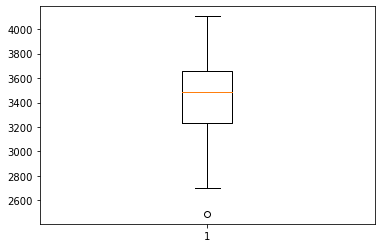

In [12]:
plt.boxplot(car['Weight'])

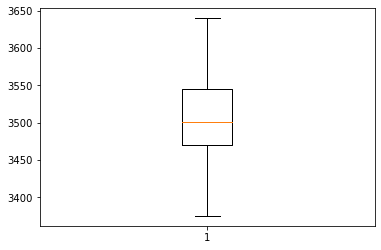

In [16]:
for i in car['Weight']:
    Q1=car['Weight'].quantile(0.25)
    Q3=car['Weight'].quantile(0.75)
    IQR=Q3-Q1
    lower_tail=Q1-1.5*IQR
    upper_tail=Q3+1.5*IQR
    if i>upper_tail or i<lower_tail:
     car['Weight']=car['Weight'].replace(i,np.mean(car['Weight']))
plt.boxplot(car['Weight'])
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
# finding the mean and std deviation of numerical columns
scaler = StandardScaler().fit(car[['MPG.city','MPG.highway','Weight','Passengers']]) 
# scaling columns to a common range
car_normalized = scaler.transform(car[['MPG.city','MPG.highway','Weight','Passengers']])# Scaled data 
#note that output is a 2-Dimensional array of normalized data
car_normalized


KeyError: "None of [Index(['MPG.city', 'MPG.highway', 'Weight', 'Passengers'], dtype='object')] are in the [columns]"

In [41]:
#updating the numerical(normalized) data into the dataframe
car_normalized=pd.DataFrame(car_normalized,columns=['MPG.city','MPG.highway','Weight','Passengers'])
car_normalized=car_normalized.join(car[car.columns.drop(['MPG.city','MPG.highway','Weight','Passengers'])])
car_normalized

KeyError: "['MPG.city', 'MPG.highway', 'Weight', 'Passengers'] not found in axis"

In [40]:
# encoding categorical values
car_features = ['Width','Price','Wheelbase','Length']
car=pd.get_dummies(car,columns=car_features)
print(car.columns)


KeyError: "None of [Index(['Width', 'Price', 'Wheelbase', 'Length'], dtype='object')] are in the [columns]"

In [39]:
plt.hist(car['MPG.highway'])

KeyError: 'MPG.highway'

In [48]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'Age': [42, 15, 67, 55, 1, 29, 75, 89, 4,10, 15, 38, 22, 77]})
print("Before: ")
print(df)

Before: 
    Age
0    42
1    15
2    67
3    55
4     1
5    29
6    75
7    89
8     4
9    10
10   15
11   38
12   22
13   77


In [49]:
df['Label'] = pd.cut(x=df['Age'], bins=[0, 3, 17, 63, 99],
                     labels=['Baby/Toddler', 'Child', 'Adult',
                             'Elderly'])
  

In [50]:
print("After: ")
print(df)

After: 
    Age         Label
0    42         Adult
1    15         Child
2    67       Elderly
3    55         Adult
4     1  Baby/Toddler
5    29         Adult
6    75       Elderly
7    89       Elderly
8     4         Child
9    10         Child
10   15         Child
11   38         Adult
12   22         Adult
13   77       Elderly


In [51]:
print("Categories: ")
print(df['Label'].value_counts())

Categories: 
Adult           5
Child           4
Elderly         4
Baby/Toddler    1
Name: Label, dtype: int64


In [69]:
import pandas as pd
import numpy as np
df1=pd.read_excel("D:/aiml/label.xlsx")
df1

,defaulter,student,balance,income,Height
0,No,Yes,817.1804,12106.14,150.4
1,Yes,Yes,1486.9980,17854.40,157.6
2,Yes,Yes,1102.4350,17391.78,170.0
3,Yes,Yes,1233.4460,12586.48,176.0
4,Yes,Yes,1276.6850,19282.44,164.2
5,Yes,Yes,1289.2460,13624.55,155.0
6,No,Yes,673.8124,17672.29,159.2
7,No,No,870.4124,17685.45,175.0
8,No,Yes,903.1768,15810.57,162.4
9,No,Yes,879.6270,14898.31,176.0


In [70]:
df1['Label'] = pd.cut(x=df1['Height'],bins=[150,157,169,180],
                     labels=['Short', 'Average', 'Tall'])
df1

KeyError: 'Height'